In [27]:
import matplotlib.pyplot as plt
import numpy as np

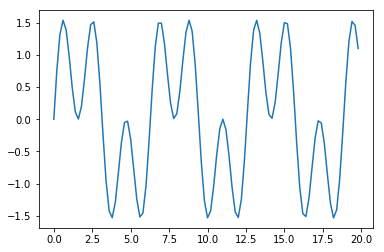

In [28]:
x = np.arange(0, 20, 0.2)
y = np.sin(x)+np.sin(x*3)

fig, ax = plt.subplots()


ax.plot(x, y)
plt.show()

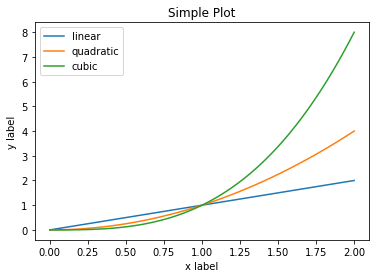

In [29]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

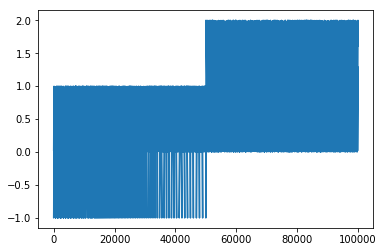

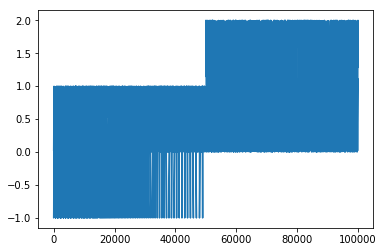

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

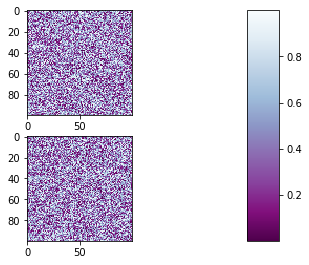

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.subplot(211)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)
plt.subplot(212)
plt.imshow(np.random.random((100, 100)), cmap=plt.cm.BuPu_r)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

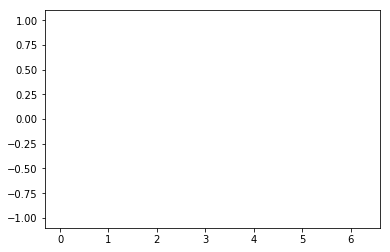

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.001)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [33]:
HTML(ani.to_html5_video())

https://matplotlib.org/gallery/lines_bars_and_markers/psd_demo.html#sphx-glr-gallery-lines-bars-and-markers-psd-demo-py

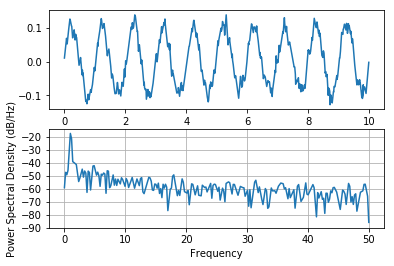

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)

cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]
s = 0.1 * np.sin(2 * np.pi * t) + cnse

plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 512, 1 / dt)

plt.show()

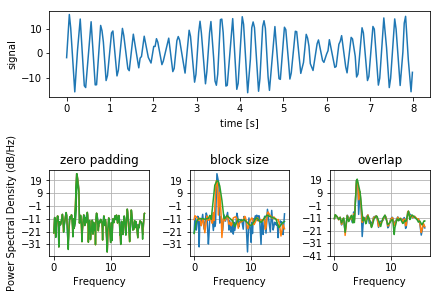

In [35]:
dt = np.pi / 100.
fs = 1. / dt
t = np.arange(0, 8, dt)
y = 10. * np.sin(2 * np.pi * 4 * t) + 5. * np.sin(2 * np.pi * 4.25 * t)
y = y + np.random.randn(*t.shape)

# Plot the raw time series
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[0, :])
ax.plot(t, y)
ax.set_xlabel('time [s]')
ax.set_ylabel('signal')

# Plot the PSD with different amounts of zero padding. This uses the entire
# time series at once
ax2 = fig.add_subplot(gs[1, 0])
ax2.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 2, Fs=fs)
ax2.psd(y, NFFT=len(t), pad_to=len(t) * 4, Fs=fs)
plt.title('zero padding')

# Plot the PSD with different block sizes, Zero pad to the length of the
# original data sequence.
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax2)
ax3.psd(y, NFFT=len(t), pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 2, pad_to=len(t), Fs=fs)
ax3.psd(y, NFFT=len(t) // 4, pad_to=len(t), Fs=fs)
ax3.set_ylabel('')
plt.title('block size')

# Plot the PSD with different amounts of overlap between blocks
ax4 = fig.add_subplot(gs[1, 2], sharex=ax2, sharey=ax2)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t), noverlap=0, Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
        noverlap=int(0.05 * len(t) / 2.), Fs=fs)
ax4.psd(y, NFFT=len(t) // 2, pad_to=len(t),
        noverlap=int(0.2 * len(t) / 2.), Fs=fs)
ax4.set_ylabel('')
plt.title('overlap')

plt.show()

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

In [36]:
%matplotlib inline

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

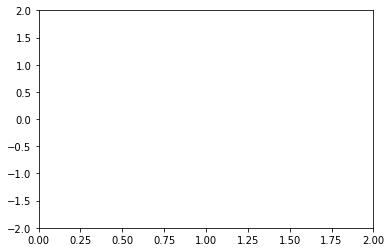

In [38]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [39]:
def init():
    line.set_data([], [])
    return (line,)

In [40]:
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.05 * i))
    line.set_data(x, y)
    return (line,)

In [41]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [42]:
HTML(anim.to_html5_video())

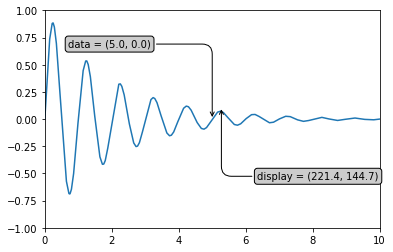

In [43]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()

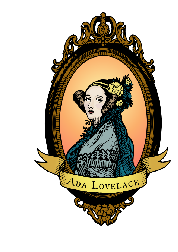

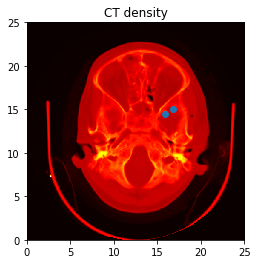

In [44]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# A sample image
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis


# And another image

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()

A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()

In [45]:
# Python code to demonstrate the working of 
# complex(), real() and imag() 
# https://www.geeksforgeeks.org/complex-numbers-in-python-set-1-introduction/

# importing "cmath" for complex number operations 
import math
import cmath 

# Initializing real numbers 
x = 5
y = cmath.sin(3)

# converting x and y into complex number 
z = complex(x,y)

# printing the complex number 
print ("The complex number is : ",end="") 
print (z)

# printing real and imaginary part of complex number 
print ("The real part of complex number is : ",end="") 
print (z.real) 

print ("The imaginary part of complex number is : ",end="") 
print (z.imag) 


The complex number is : (5+0.1411200080598672j)
The real part of complex number is : 5.0
The imaginary part of complex number is : 0.1411200080598672


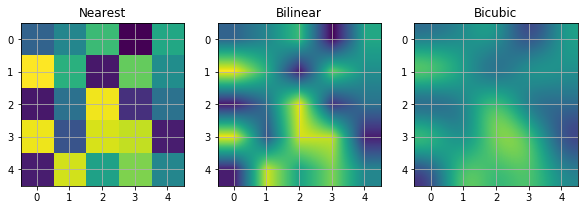

In [46]:
A = np.random.rand(5, 5)
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

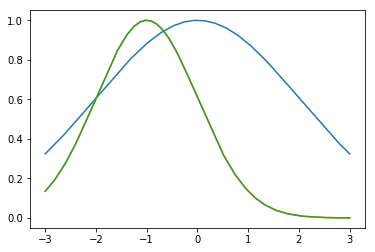

In [47]:
from matplotlib import pyplot as mp
import numpy as np

#def gaussian(x, mu, sig):
#    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
x_values = np.linspace(-3, 3, 1200)
for mu, sig in [(0, 2), (-1, 1), (-1, 1)]:
    mp.plot(x_values, gaussian(x_values, mu, sig))

mp.show()

In [ ]:
# See more information at:
# http://pyevolve.sourceforge.net/wordpress/?p=1079
# By Christian S. Perone <christian.perone@gmail.com>

# I used mencoder to create a video from all png's created
# mencoder mf://@list.txt -mf w=800:h=600:fps=%1:type=png -ovc copy -oac copy -o output.avi
# The list.txt are a list with filenames separated by line break
# The output.avi is the video output.

import mpmath
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca
from matplotlib.ticker import OldScalarFormatter

def calc_zeta(re, img_name):
    fig = plt.figure()
    axes = Axes3D(fig)
    axes.w_xaxis.set_major_formatter(OldScalarFormatter())
    axes.w_yaxis.set_major_formatter(OldScalarFormatter())
    axes.w_zaxis.set_major_formatter(OldScalarFormatter())
    
    axes.set_xlabel('X (real)')
    axes.set_ylabel('Y (imag)')
    axes.set_zlabel('Z (Zeta Img)')

    xa, ya, za  = [], [], []

    for i in np.arange(0.1, 200.0, 0.1):
        z = mpmath.zeta(complex(re, i))
        xa.append(z.real)
        ya.append(z.imag)
        za.append(i)

    axes.plot(xa, ya, za, label='Zeta Function re(s)=%.3f' % re)
    axes.legend()
    plt.grid(True)

    axes.set_xlim3d(-10.0, 12.0)
    axes.set_ylim3d(-10.0, 12.0)
    axes.set_zlim3d(0.1, 200)

    plt.savefig(img_name)
    print ("Plot %s !" % img_name)
    plt.close()

if __name__ == "__main__":
    try:
        import psyco
        psyco.full()
    except ImportError:
        pass

    mpl.rcParams['legend.fontsize'] = 10
    file_index = 0
    for i in np.arange(0.01, 10.0, 0.01):
        file_index += 1
        calc_zeta(i, "zeta_plot2_%s.png" % file_index)
        

Plot zeta_plot2_1.png !


In [ ]:
import matplotlib.pyplot as plt
from mpmath import *
f = lambda x, y: sin(x+y)*cos(y)
splot(f, [-pi,pi], [-pi,pi])    